# Analysis first of the variants and of which mutations are shared and unique between the three variants

We're interesting in identifying which mutations confer the unique activity.

We can make inferences based on the general lineage data and then go and verify these with the data from the LevSeq examples.


Nopivo1 and H2oh are the same! 


1. What is the most similar 

In [49]:
import pandas as pd

df = pd.read_csv('lineage_summary.csv')
df['name'] = [f'{l}_{n}' for l, n in df[['linage', 'name']].values]
df

,linage,enantiomer,name,mutation,codon,AA,DNA
0,NOPiv,1,NOPiv_G0,#PARENT#,#PARENT#,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
1,NOPiv,1,NOPiv_G1,V89I,ATA,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
2,NOPiv,1,NOPiv_G2,V38I,ATA,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
3,NOPiv,1,NOPiv_G3,A93L,CTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
4,NOPiv,1,NOPiv_G4,I149L,CTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
5,NOPiv,1,NOPiv_G5-1,L93I,ATT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
6,NOPiv,1,NOPiv_G6-1,L86C,TGT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
7,NOPiv,1,NOPiv_G7-1,A59V,GTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
8,NOPiv,1,NOPiv_G11-1,I38M_K43M_E115E_V127L_S186S,ATG_ATG_GAG_CTC_TCG,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDMMYLKMAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
9,NOPiv,2,NOPiv_G5-2,L93F,TTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...


In [ ]:
df['name'] == 'NOPiv_G11-1'].mutation.values() 

# Question 1: Which mutations are unique o H2NOH 

In [42]:
from sciutil import SciUtil

u = SciUtil()

h2noh = df[df['linage'] == 'H2NOH']
h2noh_mutations = set(h2noh['mutation'])

# Also look at the NOPiv mutations
nopiv = df[df['linage'] == 'NOPiv']
nopiv_mutations = set(nopiv['mutation'])

u.dp(['Mutations in both: ', set(nopiv_mutations & h2noh_mutations)])
u.dp(['Mutations in NOPiv: ', [x for x in nopiv_mutations if x not in h2noh_mutations]])
u.dp(['Mutations in H2NOH: ', [x for x in h2noh_mutations if x not in nopiv_mutations]])



# What about mutation positions
positions_nopiv = []
for aa in nopiv_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_nopiv.append(int(a[1:-1]))

positions_h2noh = []
for aa in h2noh_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_h2noh.append(int(a[1:-1]))
            
u.dp(['Positions in both: ', set(set(positions_nopiv) & set(positions_h2noh))])
u.dp(['Positions in NOPiv only: ', set([x for x in positions_nopiv if x not in positions_h2noh])])
u.dp(['Positions in H2NOH only: ', set([x for x in positions_h2noh if x not in positions_nopiv])])


--------------------------------------------------------------------------------
                       Mutations in both: 	{'#PARENT#'}	                        
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in NOPiv: 	['I149L', 'T56A', 'I55V_L196P', 'L56T', 'L93I', 'L86M', 'I38M_K43M_E115E_V127L_S186S', 'R90T', 'M86C', 'L93F', 'A59V', 'V178M', 'W62V', 'V38I', 'L86C', 'V89I', 'A93L']	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in H2NOH: 	['R13R_A59M_I149L', 'V116R', 'L22L_K29M_V31V_L33L_A45A_G61R_A144A_S163S_I167V_W174L', 'T2A_M29T', 'L196P_E197Q', 'V131V_V134A_P196L*_Q197E*', 'W62Y', 'L86F']	
--------------------------------------------------------------------------------
---------------------------------------------------------------

In [43]:
from sciutil import SciUtil

u = SciUtil()

h2noh = df[df['linage'] == 'H2NOH']
h2noh_mutations = set(h2noh['mutation'])

# Also look at the NOPiv mutations
nopiv = df[df['linage'] == 'NOPiv']
nopiv_1 = nopiv[nopiv['enantiomer'] == 1]
nopiv_2 = nopiv[nopiv['enantiomer'] == 2]

nopiv_1_mutations = set(nopiv_1['mutation'])
nopiv_2_mutations = set(nopiv_2['mutation'])

u.dp(['Mutations in all: ', set(nopiv_1_mutations & h2noh_mutations & nopiv_2_mutations)])
u.dp(['Mutations in NOPiv: ', set(nopiv_1_mutations & nopiv_2_mutations)])
u.dp(['Mutations in NOPiv 1 only: ', [x for x in nopiv_1_mutations if (x not in h2noh_mutations and x not in nopiv_2_mutations)]])
u.dp(['Mutations in NOPiv 2 only: ', [x for x in nopiv_2_mutations if (x not in h2noh_mutations and x not in nopiv_1_mutations)]])
u.dp(['Mutations in H2NOH: ', [x for x in h2noh_mutations if (x not in nopiv_1_mutations and x not in nopiv_2_mutations)]])

# What about mutation positions
positions_1_nopiv = []
for aa in nopiv_1_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_1_nopiv.append(int(a[1:-1]))

# What about mutation positions
positions_2_nopiv = []
for aa in nopiv_2_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_2_nopiv.append(int(a[1:-1]))
            
positions_h2noh = []
for aa in h2noh_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_h2noh.append(int(a[1:-1]))
            
u.dp(['Positions in all: ', set(set(positions_1_nopiv) & set(positions_h2noh) & set(positions_2_nopiv))])
u.dp(['Position in both NOPiv: ', set(set(positions_1_nopiv) & set(positions_2_nopiv))])
u.dp(['Position in both NOPiv and not H2NOH: ', [x for x in set(set(positions_1_nopiv) & set(positions_2_nopiv)) if x not in positions_h2noh]])

u.dp(['Positions in NOPiv 1 only: ', set([x for x in positions_1_nopiv if (x not in positions_h2noh and x not in positions_2_nopiv) ])])
u.dp(['Positions in NOPiv 2 only: ', set([x for x in positions_2_nopiv if (x not in positions_h2noh and x not in positions_1_nopiv) ])])

u.dp(['Positions in H2NOH only: ', set([x for x in positions_h2noh if (x not in positions_1_nopiv and x not in positions_2_nopiv)])])
u.dp(['Positions in H2NOH and NOPiv 1 only: ', set([x for x in positions_h2noh if x in positions_1_nopiv and x not in positions_2_nopiv])])
u.dp(['Positions in H2NOH and NOPiv 2 only: ', set([x for x in positions_h2noh if x in positions_2_nopiv and x not in positions_1_nopiv])])

# Also look at the single mutation i.e. just what it got translated to... 
# Update the mutations to only be the final thing i.e. at that position 
h2noh_mutations_all = []
for h in h2noh_mutations:
    h = h.split('_')
    for hm in h:
        if hm != '#PARENT#':
            h2noh_mutations_all.append(hm[1:])
nopiv_1_mutations_all = []
for h in nopiv_1_mutations:
    h = h.split('_')
    for hm in h:
        if hm != '#PARENT#':
            nopiv_1_mutations_all.append(hm[1:])
nopiv_2_mutations_all = []
for h in nopiv_2_mutations:
    h = h.split('_')
    for hm in h:
        if hm != '#PARENT#':
            nopiv_2_mutations_all.append(hm[1:])

u.dp(['Mutations in all: ', set(set(nopiv_1_mutations_all) & set(h2noh_mutations_all) & set(nopiv_2_mutations_all))])
u.dp(['Mutations in both NOPiv: ', set(set(nopiv_1_mutations_all) & set(nopiv_2_mutations_all))])
u.dp(['Mutations in both NOPiv and not H2NOH: ', [x for x in set(set(nopiv_1_mutations_all) & set(nopiv_2_mutations_all)) if x not in h2noh_mutations_all]])

u.dp(['Mutations in NOPiv 1 only: ', set([x for x in nopiv_1_mutations_all if (x not in h2noh_mutations_all and x not in nopiv_2_mutations_all) ])])
u.dp(['Mutations in NOPiv 2 only: ', set([x for x in nopiv_2_mutations_all if (x not in h2noh_mutations_all and x not in nopiv_1_mutations_all) ])])

u.dp(['Mutations in H2NOH only: ', set([x for x in h2noh_mutations_all if (x not in nopiv_1_mutations_all and x not in nopiv_2_mutations_all)])])
u.dp(['Mutations in H2NOH and NOPiv 1 only: ', set([x for x in h2noh_mutations_all if x in nopiv_1_mutations_all and x not in nopiv_2_mutations_all])])
u.dp(['Mutations in H2NOH and NOPiv 2 only: ', set([x for x in h2noh_mutations_all if x in nopiv_2_mutations_all and x not in nopiv_1_mutations_all])])


--------------------------------------------------------------------------------
                           Mutations in all: 	set()	                            
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                         Mutations in NOPiv: 	{'A59V'}	                         
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in NOPiv 1 only: 	['I149L', 'L93I', 'I38M_K43M_E115E_V127L_S186S', 'V38I', 'L86C', 'V89I', 'A93L']	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in NOPiv 2 only: 	['T56A', 'I55V_L196P', 'L56T', 'L86M', 'R90T', 'M86C', 'L93F', 'V178M', 'W62V']	
----------------------------------------------------

# The next thing we want to do is to check whether the H2NOH mutations can be "put" into the NOPiv variants

We want to rank them by the liklihood of them being able to add access to H2NOH. 

First, we're going to look through the campaigns and see if they appeared multiple times. And if they had any epistatic interactions (if so we need to highlight those ones)

## Map them to their respective parent

'20241115-JR-SSM-NOPiv.csv' doesn't have a parent?


In [44]:
df['AA'] = [d.replace('*', '') + '*' for d in df['AA'].values]
parent_to_name = dict(zip(df.AA, df.name))

In [45]:
set(parent_to_name)

{'MAPSDIPGYDYGRVEKSPITDLEFDLLKTTVMLGEEDVMYLKKAADVLKDQVDEILDLMGRYVASNEHLIYYFSNPDTGEPIKEYFERVRARWGAWVLDTTCRDYNREWLDYQYERGLRHHRSKKGVTDGVRTAPNTPLRYLIAGIYPLTATIKPLLAEKGGSPEDVEGMYNALLKSVVLQVAIWSHPYTKENDWLEHHHHHH*',
 'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAADVLKDQVDEIADLVGGVVASNEHLIYYFSNPDTGEPIKEYCERITARFGAWVLDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPNTPLRYLIAGIYPLTATIKPLLAEKGGSPEDIEGMYNAWLKSMVLQVAIWSHPYTKENDWLEHHHHHH*',
 'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAADVLKDQVDEILDLAGGWVASNEHLIYYFSNPDTGEPIKEYCERIRARIGAWVLDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPNTPLRYLIAGIYPLTATIKPLLAEKGGSPEDIEGMYNAWLKSVVLQVAIWSHPYTKENDWLEHHHHHH*',
 'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAADVLKDQVDEILDLAGGWVASNEHLIYYFSNPDTGEPIKEYLERIRARAGAWVLDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPNTPLRYLIAGIYPITATIKPLLAEKGGSPEDIEGMYNAWLKSVVLQVAIWSHPYTKENDWLEHHHHHH*',
 'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAADVLKDQVDEILDLAGGWVASNEHLIYYFSNPDTGEPIKEYLERIRARFGAWVLDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPNTPLRYLIAGIYPLTATIKPLLAEKGG

In [46]:
import numpy as np
from tqdm import tqdm

# Amino acid code conversion
AA_DICT = {
    "Ala": "A",
    "Cys": "C",
    "Asp": "D",
    "Glu": "E",
    "Phe": "F",
    "Gly": "G",
    "His": "H",
    "Ile": "I",
    "Lys": "K",
    "Leu": "L",
    "Met": "M",
    "Asn": "N",
    "Pro": "P",
    "Gln": "Q",
    "Arg": "R",
    "Ser": "S",
    "Thr": "T",
    "Val": "V",
    "Trp": "W",
    "Tyr": "Y",
    "Ter": "*",
}


def normalise_calculate_stats(processed_plate_df, value_column, normalise="standard", stats_method="mannwhitneyu", parent_label="#PARENT#", normalise_method="median", parent_to_name = None):
    # if nomrliase normalize with standard normalisation
    normalised_df = pd.DataFrame()
    all_stats_df = pd.DataFrame()
    for plate in set(processed_plate_df["barcode_plate"].values):
        # Normalize for each value
        plate_parent = None
        plate_campaign = None
        sub_df = processed_plate_df[processed_plate_df["barcode_plate"] == plate].copy()
        if parent_to_name:
            try:
                aa = sub_df[sub_df['amino_acid_substitutions'] == parent_label]['aa_sequence'].values[0]
                sub_df['campaign_name'] = parent_to_name.get(aa + '*')
                plate_parent = aa + '*'
                plate_campaign = parent_to_name.get(aa + '*')
            except:
                sub_df['campaign_name'] = 'NO PARENT!'
                sub_df['parent'] = None
                
        parent_values = sub_df[sub_df["amino_acid_substitutions"] == parent_label][value_column].values
        if len(parent_values) == 0:
            u.err_p(['No parent!!! skipping... '])
            parent_values = sub_df[value_column].values
            continue
        else:
            # By default use the median
            if normalise_method == "median":
                parent_mean = np.nanmedian(parent_values)
            else:
                parent_mean = np.nanmean(parent_values)
            parent_sd = np.nanstd(parent_values)
    
            # For each plate we normalise to the parent of that plate
            sub_df[f"{value_column} plate standard norm"] = (sub_df[value_column].values - parent_mean) / parent_sd
            norm_value_column = f"{value_column} plate standard norm"    
            sd_cutoff = 1.5  # The number of standard deviations we want above the parent values
            # Now for all the other mutations we want to look if they are significant, first we'll look at combinations and then individually
            grouped_by_mutations = sub_df.groupby("amino_acid_substitutions")
        
            rows = []
            for mutation, grp in grouped_by_mutations:
                # Get the values and then do a ranksum test
                if mutation != parent_label:
                    vals = list(grp[norm_value_column].values)
                    U1, p = None, None
                    # Now check if there are 3 otherwise we just do > X S.D over - won't be sig anyway.
                    if len(grp) > 2:
                        # Do stats
                        U1, p = mannwhitneyu(parent_values, vals, method="exact")
                    if normalise_method == "median":
                        mean_vals = np.nanmedian(vals)
                    else:
                        mean_vals = np.nanmean(vals)
                    std_vals = np.nanstd(vals)
                    median_vals = np.nanmedian(vals)
                    sig = mean_vals > ((sd_cutoff * parent_sd) + parent_mean)
                    rows.append([value_column, mutation, len(grp), mean_vals, std_vals, median_vals, mean_vals, sig, U1, p, plate_campaign, plate_parent, plate])
            stats_df = pd.DataFrame(rows, columns=["value_column",  "amino_acid_substitutions", "number of wells with amino_acid substitutions", "mean",
                    "std", "median", "amount greater than parent mean", f"greater than > {sd_cutoff} parent", "man whitney U stat",
                    "p-value", 'campaign',  'parent', 'plate'],
                )
            all_stats_df = pd.concat([all_stats_df, stats_df])
            normalised_df = pd.concat([normalised_df, sub_df])

    return all_stats_df, normalised_df


In [47]:
# get all the sequnence function files and see what those specific mutations did
# Also did any of the other mutations appear in the H2NOH files
import os
from copy import deepcopy

# Get them w.r.t to a mutation
from scipy.stats import mannwhitneyu

all_dfs = {}
all_stats_dfs = pd.DataFrame()
all_df = pd.DataFrame()
for base_dir in ['LCMS/NOPiv-linage_Done', 'LCMS/H2NOH-linage_Done']:
    files = [f for f in os.listdir(base_dir) if '.csv' in f]

    for f in files:
        if f != '20241115-JR-SSM-NOPiv.csv':
            # Get all the sequence function files.
            run_name = f.replace('.csv', '')
            if os.path.exists(os.path.join(base_dir, run_name)):
                function_files = os.listdir(os.path.join(base_dir, run_name))
                
                all_function_df = pd.DataFrame()
                for function_file in function_files:
                    try:
                        # Barcode
                        barcode = function_file.split('.csv')[0].split('_')[-1]
                        function_df = pd.read_csv(f'{base_dir}/{run_name}/{function_file}', header=1)
                        # Now we want to line up the barcode with the file and then join on the wells
                        function_df['function_well'] = [x.split('-')[-1] if isinstance(x, str) else None for x in function_df['Sample Vial Number'].values]
                        function_df['function_barcode_plate'] = barcode
                        function_df['barcode_well'] = [f'{p}_{w}' for w, p in function_df[['function_well', 'function_barcode_plate']].values]
                        function_df['filename'] = function_file
                        all_function_df = pd.concat([all_function_df, function_df])
                    except:
                        print('fuction file', function_file)
                    # Now we want to join with the larger df 
                # Now join the two toegther 
                df = pd.read_csv(f'{base_dir}/{f}')
                
                df.columns = [c.lower() for c in df.columns]
                if 'barcode_plate' not in df.columns:
                    df = df.rename(columns={'protein sequence': 'aa_sequence'})
                    df['barcode_plate'] = df['plate'].values
                df['barcode_well'] = [f'{p}_{w}' for w, p in df[['well', 'barcode_plate']].values]
                # Join the two
                df.set_index('barcode_well', inplace=True)
                all_function_df.set_index('barcode_well', inplace=True)
                df = df.join(all_function_df, how='inner')
                df.reset_index(inplace=True, drop=True)
                print(len(df))
                # Now go through the df and normalize to the parent
                normalized_parents = {}
                df['levSeq_filename'] = run_name
                if 'nucleotide_mutation' not in df.columns:
                    df = df.rename(columns={'variant': 'nucleotide_mutation', 
                                            'mutations': 'amino_acid_substitutions', 
                                            'aa_variant': 'aa_sequence',
                                           })
                df.columns = [c.replace(' ', '_') for c in df.columns]
                df = df[['barcode_plate',
                         'nucleotide_mutation',
                         'amino_acid_substitutions',
                         'well', 
                         'average_mutation_frequency', 
                         'alignment_count',
                         'aa_sequence',
                       'Sample_Acq_Order_No', 'Sample_Vial_Number', 'Sample_Name',
                       'Compound_Name', 'RT_[min]', 'Area', 'function_well',
                       'function_barcode_plate', 'filename', 'levSeq_filename']]
                df = df.loc[:,~df.columns.duplicated()].copy()
                updated_df = pd.DataFrame()
                for plate in set(df["barcode_plate"].values):
                    # Normalize for each value
                    plate_parent = None
                    plate_campaign = None
                    sub_df = df[df["barcode_plate"] == plate].copy()
                    if parent_to_name:
                        try:
                            aa = sub_df[sub_df['amino_acid_substitutions'] == '#PARENT#']['aa_sequence'].values[0]
                            sub_df['campaign_name'] = parent_to_name.get(aa + '*')
                            plate_parent = aa + '*'
                            plate_campaign = parent_to_name.get(aa + '*')
                        except:
                            sub_df['campaign_name'] = 'NO PARENT!'
                            sub_df['parent'] = None
                    
                    updated_df = pd.concat([updated_df, sub_df])
                df = updated_df
                #try:

    
                try:
                    stats_df, df = normalise_calculate_stats(df, 'Area',
                                    normalise="standard",
                                    stats_method="mannwhitneyu",
                                    parent_label="#PARENT#",
                                    normalise_method="median",
                                    parent_to_name = parent_to_name)
                    stats_df['levSeq_filename'] = run_name
                    all_dfs[run_name] = df
                    all_df = pd.concat([all_df, df])
                    all_stats_dfs =  pd.concat([all_stats_dfs, stats_df])
                    print('Success!', run_name)
                except:
                    u.warn_p([run_name])

df

0
--------------------------------------------------------------------------------
                             20240603-JR-SSM-NOPiv	                             
--------------------------------------------------------------------------------
fuction file .csv
288
Success! 20240404-JR-SSM-NOPiv-E1
fuction file .csv
288
Success! 20240404-JR-SSM-NOPiv-E2
fuction file summary_2.xlsx
fuction file summary.xlsx
137
Success! 20241106-JR-SSM-NOPiv
384
Success! 20250122-JR-epPCR-NOPiv
576
--------------------------------------------------------------------------------
                           No parent!!! skipping... 	                           
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                           No parent!!! skipping... 	                           
--------------------------------------------------------------------------------
---------------------------

/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:80: RuntimeWarning: All-NaN slice encountered
  mean_vals = np.nanmedian(vals)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:84: RuntimeWarning: All-NaN slice encountered
  median_vals = np.nanmedian(vals)
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:80: RuntimeWarning: All-NaN slice encountered
  mean_vals = np.nanmedian(vals)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:84: RuntimeWarning: A

288
Success! 20250122-JR-epPCR-H2NOH
508
--------------------------------------------------------------------------------
                           No parent!!! skipping... 	                           
--------------------------------------------------------------------------------
Success! 20250215_SSM-H2NOH
192
Success! 20250227_StEP-H2NOH
1152
--------------------------------------------------------------------------------
                            20240504-JR-StEP-H2NOH	                             
--------------------------------------------------------------------------------
672
Success! 20250319_SSM-H2NOH
453
Success! 20240517-JR-SSM-H2NOH
326


/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:80: RuntimeWarning: All-NaN slice encountered
  mean_vals = np.nanmedian(vals)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:84: RuntimeWarning: All-NaN slice encountered
  median_vals = np.nanmedian(vals)
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:80: RuntimeWarning: All-NaN slice encountered
  mean_vals = np.nanmedian(vals)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:84: RuntimeWarning: A

Success! 20240702-JR-epPCR-H2NOH
430
Success! 20240421-JR-SSM-H2NOH
384
Success! 20240603-JR-SSM-H2NOH
768
Success! 20250404_epPCR-H2NOH


/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:80: RuntimeWarning: All-NaN slice encountered
  mean_vals = np.nanmedian(vals)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:84: RuntimeWarning: All-NaN slice encountered
  median_vals = np.nanmedian(vals)
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:80: RuntimeWarning: All-NaN slice encountered
  mean_vals = np.nanmedian(vals)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_78361/2080532688.py:84: RuntimeWarning: A

,barcode_plate,nucleotide_mutation,amino_acid_substitutions,well,average_mutation_frequency,alignment_count,aa_sequence,Sample_Acq_Order_No,Sample_Vial_Number,Sample_Name,Compound_Name,RT_[min],Area,function_well,function_barcode_plate,filename,levSeq_filename,campaign_name,Area plate standard norm
0,33,G24A_A39T_C66T_T86A_T93C_G99A_G106A_G133T_C134...,#LOW#,A1,0.644444,7.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACD...,2,D3F-A1,D3F-A1,Pdt,NaN,NaN,A1,33,20250403_HMC_epPCR_PA_P1_33.csv,20250404_epPCR-H2NOH,None,NaN
1,33,#PARENT#,#PARENT#,A2,NaN,137.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,3,D3F-A2,D3F-A2,Pdt,1.150,506621.8771,A2,33,20250403_HMC_epPCR_PA_P1_33.csv,20250404_epPCR-H2NOH,None,-0.571200
2,33,#PARENT#,#PARENT#,A3,NaN,171.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,4,D3F-A3,D3F-A3,Pdt,1.150,501359.6713,A3,33,20250403_HMC_epPCR_PA_P1_33.csv,20250404_epPCR-H2NOH,None,-0.618152
3,33,A161T_A215G_T353C_A478G_A568T,E54V_Y72C_L118P_K160E_T190S,A4,0.927434,113.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,5,D3F-A4,D3F-A4,Pdt,NaN,NaN,A4,33,20250403_HMC_epPCR_PA_P1_33.csv,20250404_epPCR-H2NOH,None,NaN
4,33,A149G_G169C,D50G_D57H,A5,0.938389,211.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,6,D3F-A5,D3F-A5,Pdt,1.098,510465.3941,A5,33,20250403_HMC_epPCR_PA_P1_33.csv,20250404_epPCR-H2NOH,None,-0.536907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,40,T193C_T420A_T553A,S65P_W185R,H8,0.928205,65.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,93,D6B-H8,D6B-H8,Pdt,1.080,77850.9941,H8,40,20250403_HMC_epPCR_PA_P8_40.csv,20250404_epPCR-H2NOH,None,-7.236357
764,40,#PARENT#,#PARENT#,H9,NaN,283.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,94,D6B-H9,D6B-H9,Pdt,1.082,407279.0180,H9,40,20250403_HMC_epPCR_PA_P8_40.csv,20250404_epPCR-H2NOH,None,-0.792501
765,40,A29T,D10V,H10,0.937173,191.0,MTPSDIPGYVYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,95,D6B-H10,D6B-H10,Pdt,1.080,208648.1904,H10,40,20250403_HMC_epPCR_PA_P8_40.csv,20250404_epPCR-H2NOH,None,-4.677867
766,40,T78G_T204C_A317C_T408A_T470A_C600DEL,LEN,H11,0.914993,249.0,#DEL#,96,D6B-H11,D6B-H11,Pdt,NaN,NaN,H11,40,20250403_HMC_epPCR_PA_P8_40.csv,20250404_epPCR-H2NOH,None,NaN


In [48]:
all_df = all_df[~all_df['Area'].isna()]
all_df['campaign_name'].value_counts() # 20250404_epPCR-H2NOH this is G6 (or -2)

# NOPiv_G7-1     421
# H2NOH_G4       375
# H2NOH_G3       352
# H2NOH_G2       352
# NO PARENT!     347
# NOPiv_G7-2     277
# NOPiv_G8-2     277
# H2NOH_G5       266
# NOPiv_G9-2     234
# NOPiv_G10-2    226

NOPiv_G7-1    503
H2NOH_G4      375
H2NOH_G3      352
H2NOH_G2      352
NOPiv_G7-2    277
H2NOH_G5      266
Name: campaign_name, dtype: int64

In [16]:
all_df[all_df['levSeq_filename'] == '20250404_epPCR-H2NOH']['aa_sequence'].values[0]

'MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAADVLKDQVDEILDLMGRYVASNEHLIYYFSNPDTGEPIKEYFERVRARWGAWVLDTTCRDYNREWLDYQYERGLRHHRSKKGVTDGVRTAPNTPLRYLIAGIYPLTATIKPLLAEKGGSPEDVEGMYNALLKSVVLQVAIWSHPYTKENDWLEHHHHHH*'

In [17]:
all_df['levSeq_filename'].value_counts()

20240416-JR-SSM-NOPiv       558
20250404_epPCR-H2NOH        444
20250319_SSM-H2NOH          433
20250122-JR-epPCR-NOPiv     379
20240603-JR-SSM-H2NOH       375
20240726-JR-epPCR-NOPiv     364
20240517-JR-SSM-H2NOH       352
20240421-JR-SSM-H2NOH       352
20250215_SSM-H2NOH          288
20240404-JR-SSM-NOPiv-E1    283
20240404-JR-SSM-NOPiv-E2    277
20250122-JR-epPCR-H2NOH     266
20240603-JR-SSM-NOPiv       234
20240702-JR-epPCR-H2NOH     212
20250227_StEP-H2NOH         191
20241106-JR-SSM-NOPiv       103
Name: levSeq_filename, dtype: int64

In [18]:
# Update the mutations to only be the final thing i.e. at that position 
h2noh_mutations_all = []
for h in h2noh_mutations:
    h = h.split('_')
    for hm in h:
        if hm != '#PARENT#':
            h2noh_mutations_all.append(hm[1:])
nopiv_1_mutations_all = []
for h in nopiv_1_mutations:
    h = h.split('_')
    for hm in h:
        if hm != '#PARENT#':
            nopiv_1_mutations_all.append(hm[1:])
nopiv_2_mutations_all = []
for h in nopiv_2_mutations:
    h = h.split('_')
    for hm in h:
        if hm != '#PARENT#':
            nopiv_2_mutations_all.append(hm[1:])
nopiv_2_mutations_all

['56A', '55V', '196P', '56T', '86M', '90T', '86C', '93F', '59V', '178M', '62V']

In [19]:
positions_h2noh_nopiv_2 = set([x for x in positions_h2noh if x in positions_2_nopiv and x not in positions_1_nopiv])
positions_h2noh_nopiv_1 = set([x for x in positions_h2noh if x in positions_1_nopiv and x not in positions_2_nopiv])

positions_mutated_throughout_campaign = []
files_w_issues = []
position_labels = []
mutation_labels = []
mutations_throughput_campaign = []
for aa, filename in all_df[['amino_acid_substitutions', 'filename']].values:
    position_label = []
    mutation_label = []
    if aa !=  '#PARENT#' and aa != '#N.A.#' and aa != '-' and aa != None:
        #try:
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            try:
                p = int(a[1:-1])
            except:
                p = a
            a = a[1:]
            if p in positions_h2noh:
                position_label.append('H2NOH')
            if p in positions_1_nopiv:
                position_label.append('NOPiV_1')
            if p in positions_2_nopiv:
                position_label.append('NOPiV_2')
            if a in h2noh_mutations_all:
                mutation_label.append('H2NOH')
            if a in nopiv_1_mutations_all:
                mutation_label.append('NOPiV_1')
            if a in nopiv_2_mutations_all:
                mutation_label.append('NOPiV_2')
            positions_mutated_throughout_campaign.append(p)
            mutations_throughput_campaign.append(a)
        # except:
        #     files_w_issues.append(filename) #print(aa, filename)
    position_label = list(set(position_label))
    position_label.sort()
    if len(position_label) == 0:
        position_labels.append('Not used')
    else:
        position_labels.append(' '.join(position_label))
    mutation_label = list(set(mutation_label))
    mutation_label.sort()
    if len(mutation_label) == 0:
        mutation_labels.append('Not used')
    else:
        mutation_labels.append(' '.join(mutation_label))
len(set(positions_mutated_throughout_campaign)), len(set(files_w_issues))
all_df['position_labels'] = position_labels
all_df['mutation_labels'] = mutation_labels

In [20]:
all_df['mutation_labels'].value_counts()

Not used           4684
H2NOH               175
NOPiV_2             154
NOPiV_1              54
NOPiV_1 NOPiV_2      30
H2NOH NOPiV_1         8
H2NOH NOPiV_2         6
Name: mutation_labels, dtype: int64

In [21]:
all_df['position_labels'].value_counts()
# Not used                 4494
# H2NOH NOPiV_1 NOPiV_2     635
# NOPiV_2                   600
# H2NOH NOPiV_1             477
# H2NOH                     299
# NOPiV_1                   282
# NOPiV_1 NOPiV_2           107
# H2NOH NOPiV_2              89

Not used                 3459
NOPiV_2                   595
H2NOH NOPiV_1 NOPiV_2     310
H2NOH                     227
NOPiV_1                   208
H2NOH NOPiV_1             171
H2NOH NOPiV_2              83
NOPiV_1 NOPiV_2            58
Name: position_labels, dtype: int64

In [22]:
all_df['mutation_labels'].value_counts()

Not used           4684
H2NOH               175
NOPiV_2             154
NOPiV_1              54
NOPiV_1 NOPiV_2      30
H2NOH NOPiV_1         8
H2NOH NOPiV_2         6
Name: mutation_labels, dtype: int64

In [23]:
len(set(positions_h2noh) & set(positions_mutated_throughout_campaign)), len(set(positions_1_nopiv) & set(positions_mutated_throughout_campaign)), len(set(positions_2_nopiv) & set(positions_mutated_throughout_campaign)) 

(21, 10, 9)

In [24]:
all_df.reset_index(inplace=True)

# Map all mutations back to their respective parent

/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/sit

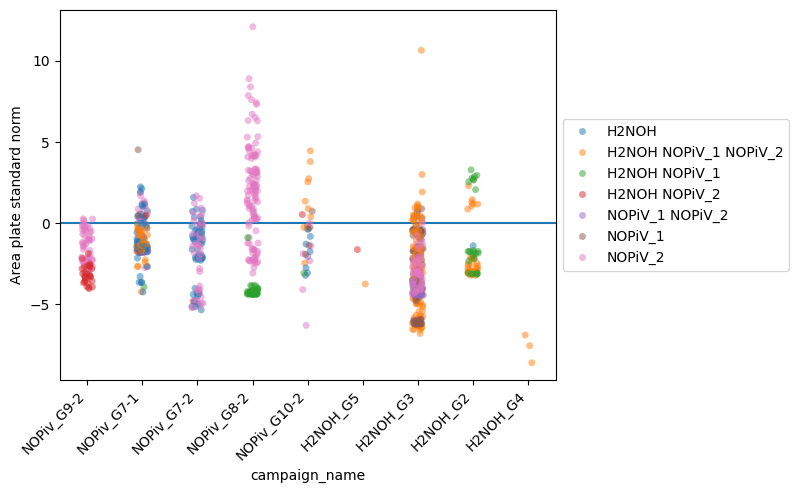

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
#all_df.reset_index(inplace=True)
all_df = all_df[all_df['amino_acid_substitutions'] != '-']
hue_order = ['H2NOH', 'H2NOH NOPiV_1 NOPiV_2', 'H2NOH NOPiV_1', 'H2NOH NOPiV_2', 'NOPiV_1 NOPiV_2', 'NOPiV_1',  'NOPiV_2'] #  'Not used', 
# Great let's also annotate all mutations that were identified in the final variants or not 
used_df = all_df[all_df['position_labels'] != 'Not used']
used_df = used_df[~used_df['campaign_name'].isna()]
sns.stripplot(used_df, x='campaign_name', y='Area plate standard norm', hue='position_labels', hue_order=hue_order, alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y=0)

In [27]:
used_df['campaign_name'].value_counts()

H2NOH_G3       275
NOPiv_G7-1     166
NOPiv_G8-2     165
NOPiv_G7-2      98
NOPiv_G9-2      79
H2NOH_G2        73
NOPiv_G10-2     31
H2NOH_G4         3
H2NOH_G5         2
Name: campaign_name, dtype: int64

In [28]:
used_df['mutation_labels'].value_counts()

Not used           643
H2NOH              125
NOPiV_2             66
NOPiV_1 NOPiV_2     26
NOPiV_1             23
H2NOH NOPiV_1        8
H2NOH NOPiV_2        1
Name: mutation_labels, dtype: int64

In [29]:
used_df['position_labels'].value_counts()

NOPiV_2                  323
H2NOH NOPiV_1 NOPiV_2    202
H2NOH                    130
NOPiV_1                   92
H2NOH NOPiV_1             79
NOPiV_1 NOPiV_2           34
H2NOH NOPiV_2             32
Name: position_labels, dtype: int64

/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/sit

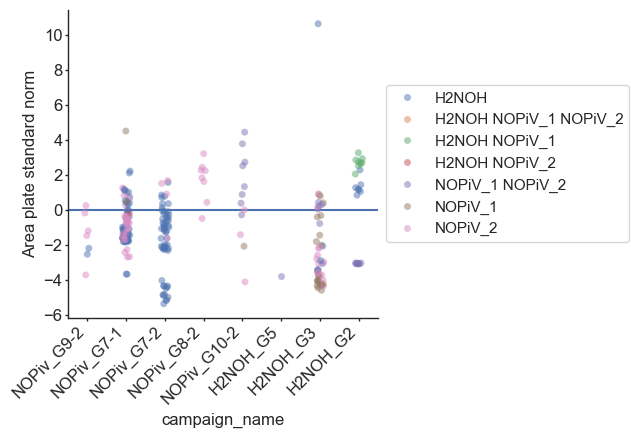

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
used_df = used_df[used_df['mutation_labels'] != 'Not used']
#all_df = all_df[all_df['amino-acid_substitutions'] != '-']
hue_order = ['H2NOH', 'H2NOH NOPiV_1 NOPiV_2', 'H2NOH NOPiV_1', 'H2NOH NOPiV_2', 'NOPiV_1 NOPiV_2', 'NOPiV_1',  'NOPiV_2']
# Great let's also annotate all mutations that were identified in the final variants or not 
ax = sns.stripplot(used_df, x='campaign_name', y='Area plate standard norm', hue='mutation_labels', hue_order=hue_order, alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y=0)
ax = format_fig(ax)

In [31]:
used_df[used_df['mutation_labels'] != 'Not used'] 

,index,barcode_plate,nucleotide_mutation,amino_acid_substitutions,well,average_mutation_frequency,alignment_count,aa_sequence,Sample_Acq_Order_No,Sample_Vial_Number,...,Area,function_well,function_barcode_plate,filename,levSeq_filename,campaign_name,Area plate standard norm,parent,position_labels,mutation_labels
5,6,5,C166A_T167C_T168G,L56T,A7,1.000000,49.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,8,D3F-A7,...,191240.6805,A7,5,JR-20240603-SSM-P1_5.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,-1.184491,NaN,NOPiV_2,NOPiV_2
10,12,5,C166A_T167C_T168G,L56T,B1,0.977778,45.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,14,D3F-B1,...,300219.0794,B1,5,JR-20240603-SSM-P1_5.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,-0.165006,NaN,NOPiV_2,NOPiV_2
17,19,5,C166A_T167C_T168G,L56T,B8,0.978495,31.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,21,D3F-B8,...,346091.0975,B8,5,JR-20240603-SSM-P1_5.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,0.264123,NaN,NOPiV_2,NOPiV_2
24,26,5,C166A_T167C_T168G,L56T,C3,0.958333,72.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,28,D3F-C3,...,161748.9960,C3,5,JR-20240603-SSM-P1_5.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,-1.460383,NaN,NOPiV_2,NOPiV_2
134,144,6,G185A_G186T,W62Y,E1,0.972973,37.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,50,D3B-E1,...,153092.9713,E1,6,JR-20240603-SSM-P2_combined_6.csv,20240603-JR-SSM-NOPiv,NOPiv_G9-2,-2.178216,NaN,H2NOH NOPiV_2,H2NOH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,244,9,A445C_C447G,I149L,E7,0.939394,34.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,56,D4F-E7,...,401497.9963,E7,9,Y85X-Y149X_9.csv,20240421-JR-SSM-H2NOH,H2NOH_G2,2.762468,NaN,H2NOH NOPiV_1,H2NOH NOPiV_1
4157,260,9,A445C_C447G,I149L,F11,0.953125,65.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,72,D4F-F11,...,386728.5543,F11,9,Y85X-Y149X_9.csv,20240421-JR-SSM-H2NOH,H2NOH_G2,2.540428,NaN,H2NOH NOPiV_1,H2NOH NOPiV_1
4160,268,9,A445C_C447T,I149L,G7,0.955556,45.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,80,D4F-G7,...,355013.6760,G7,9,Y85X-Y149X_9.csv,20240421-JR-SSM-H2NOH,H2NOH_G2,2.063634,NaN,H2NOH NOPiV_1,H2NOH NOPiV_1
4166,281,9,A445C_C447T,I149L,H8,0.901575,127.0,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,93,D4F-H8,...,413516.3021,H8,9,Y85X-Y149X_9.csv,20240421-JR-SSM-H2NOH,H2NOH_G2,2.943149,NaN,H2NOH NOPiV_1,H2NOH NOPiV_1


In [32]:
# Great so there are definitely some epistatic events that are going on!
used_df['amino_acid_substitutions'].value_counts()

M1N_T2A_P3N                                       107
L56T_C86M_R90T_I93F_V178M                          16
V178M                                              14
M59A_W62V                                           9
L56T                                                8
A59V                                                8
W93L                                                8
I149L                                               8
T56L_M86C_T90R_F93I_M178V                           7
L86C                                                7
A59M                                                7
V38I                                                5
L56A                                                4
M59A_W62Y                                           4
L86M                                                3
W93I                                                3
V89I                                                2
W62Y                                                2
V38M                        

# Questions we want to ask:

There are 287 unique mutation combinations that 
For each of the final mutations we want to consider
1. positive epistasis
2. negative epistasis 

In [33]:
all_stats_dfs.replace([np.inf, -np.inf], np.nan, inplace=True)
all_stats_dfs = all_stats_dfs[~all_stats_dfs['amount greater than parent mean'].isna()]
all_stats_dfs

,value_column,amino_acid_substitutions,number of wells with amino_acid substitutions,mean,std,median,amount greater than parent mean,greater than > 1.5 parent,man whitney U stat,p-value,campaign,parent,plate,levSeq_filename
0,Area,#N.A.#,6,-2.748661,0.666076,-2.748661,-2.748661,False,NaN,NaN,NOPiv_G9-2,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,5,20240603-JR-SSM-NOPiv
2,Area,G60C,1,-2.113220,0.000000,-2.113220,-2.113220,False,NaN,NaN,NOPiv_G9-2,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,5,20240603-JR-SSM-NOPiv
3,Area,G60D,1,-2.332092,0.000000,-2.332092,-2.332092,False,NaN,NaN,NOPiv_G9-2,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,5,20240603-JR-SSM-NOPiv
4,Area,G60F,1,-2.491200,0.000000,-2.491200,-2.491200,False,NaN,NaN,NOPiv_G9-2,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,5,20240603-JR-SSM-NOPiv
5,Area,G60H,1,-0.990613,0.000000,-0.990613,-0.990613,False,NaN,NaN,NOPiv_G9-2,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,5,20240603-JR-SSM-NOPiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,Area,S65P_W185R,1,-7.236357,0.000000,-7.236357,-7.236357,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,40,20250404_epPCR-H2NOH
45,Area,T2I,1,-2.274425,0.000000,-2.274425,-2.274425,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,40,20250404_epPCR-H2NOH
46,Area,T2I_D104G,1,-4.288698,0.000000,-4.288698,-4.288698,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,40,20250404_epPCR-H2NOH
47,Area,T30S_N106D,1,-5.948133,0.000000,-5.948133,-5.948133,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,40,20250404_epPCR-H2NOH


In [34]:
all_stats_dfs = all_stats_dfs[~all_stats_dfs['amino_acid_substitutions'].isin(['#N.A.#', '-', '#LOW#', 'LEN'])]
all_stats_dfs['amino_acid_substitutions'].value_counts()

L56I           7
M1N_T2A_P3N    6
L56F           6
Y171S          6
Y85H           6
              ..
H120R          1
E80K           1
E108V          1
A91D_C102Y     1
T30S_N106D     1
Name: amino_acid_substitutions, Length: 977, dtype: int64

/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/sit

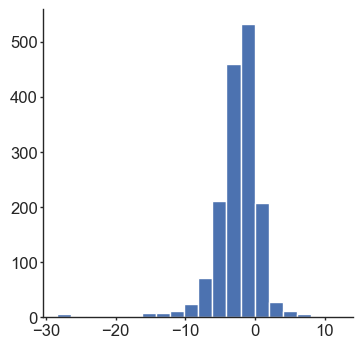

In [39]:
dpi=300
style='ticks'
palette='pastel'
opacity=0.8
default_colour="teal"
figsize=(4, 4)
title_font_size=12
label_font_size=8
title_font_weight="bold"
text_font_weight="bold"
font_family = 'sans-serif'
font = 'Arial'
sns.set(rc={'figure.figsize': figsize, 'font.family': font_family,
            'font.sans-serif': font, 'font.size': label_font_size}, 
        style=style)
plt.rcParams['font.family'] = font_family
plt.rcParams['font.sans-serif'] = font
sns.color_palette("viridis", as_cmap=True)

def format_fig(ax):
    ax.tick_params(direction='out', length=2, width=1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(labelsize=12)
    ax.tick_params(axis='x', which='major', pad=2.0)
    ax.tick_params(axis='y', which='major', pad=2.0)

fig, ax = plt.subplots()
ax.hist(all_stats_dfs['amount greater than parent mean'].values, bins=20)
ax = format_fig(ax)

In [36]:
# Certain amino acid subsitutions 
len(all_stats_dfs[all_stats_dfs['amount greater than parent mean'] > 1.5])

64

In [37]:
all_stats_dfs[all_stats_dfs['amount greater than parent mean'] > 1.5]['campaign'].value_counts()

NOPiv_G8-2     29
NOPiv_G7-1      4
NOPiv_G10-2     3
H2NOH_G3        1
H2NOH_G2        1
H2NOH_G4        1
Name: campaign, dtype: int64

In [38]:
gr = all_stats_dfs[all_stats_dfs['amount greater than parent mean'] > 1.5]
gr = gr[gr['campaign'].isna()]
gr

,value_column,amino_acid_substitutions,number of wells with amino_acid substitutions,mean,std,median,amount greater than parent mean,greater than > 1.5 parent,man whitney U stat,p-value,campaign,parent,plate,levSeq_filename
12,Area,K43R,1,2.358619,0.000000,2.358619,2.358619,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,18,20250215_SSM-H2NOH
9,Area,L56I,2,1.696387,0.136352,1.696387,1.696387,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,19,20250215_SSM-H2NOH
17,Area,W62Y,1,2.558442,0.000000,2.558442,2.558442,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,20,20250215_SSM-H2NOH
13,Area,Y141M,2,2.566458,1.261271,2.566458,2.566458,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,23,20250215_SSM-H2NOH
4,Area,P188A,2,1.569723,1.030697,1.569723,1.569723,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,25,20250215_SSM-H2NOH
7,Area,P188E,1,1.729568,0.000000,1.729568,1.729568,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,25,20250215_SSM-H2NOH
8,Area,P188G,2,1.717325,0.180166,1.717325,1.717325,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,25,20250215_SSM-H2NOH
16,Area,P188T,1,1.786285,0.000000,1.786285,1.786285,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,25,20250215_SSM-H2NOH
6,Area,K43R_V116R,1,4.652018,0.000000,4.652018,4.652018,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,37,20250227_StEP-H2NOH
13,Area,L56I_Y141M,1,1.845013,0.000000,1.845013,1.845013,False,NaN,NaN,None,MTPSDIPGYDYGRVEKSPITDLEFDLLKMTVMLGEEDVMYLKKAAD...,37,20250227_StEP-H2NOH
